In [1]:
# warnings, drop_first(in get_dummies to avoid dummy variable trap),axis=1(0-rows 1-columns)

# isna().sum(),fillna 

# balancing between overfit and underfit

# lambda - acts as penalty when mse increases

📘 L1 & L2 Regularization (Lasso & Ridge)

🔹 Why Regularization?

Regularization is used to prevent overfitting.

📌 Overfitting vs Underfitting

Overfitting → Model memorizes training data, performs poorly on new data

Underfitting → Model is too simple, misses patterns

👉 Regularization balances this trade-off

🔹 What is L1 and L2 Regularization?

Regularization adds a penalty term to the loss function.

General Loss Function

    Total Loss = Error (MSE) + Penalty

🔹 L1 Regularization (Lasso Regression)

📌 Formula

Loss = MSE + λ × Σ|weights|

🔍 Key Properties

Uses absolute values of weights

Can make some weights exactly zero

Performs feature selection

✅ Advantages

    ✔ Reduces overfitting

    ✔ Automatically removes irrelevant features

❌ Disadvantages

    ❌ Unstable when features are highly correlated

🔹 L2 Regularization (Ridge Regression)

📌 Formula

Loss = MSE + λ × Σ(weights²)

🔍 Key Properties

Uses squared weights

Shrinks weights close to zero, but not exactly zero

Keeps all features

✅ Advantages

✔ Handles multicollinearity well
✔ More stable than L1

❌ Disadvantages

❌ Does NOT perform feature selection

🔹 Difference Between Lasso (L1) and Ridge (L2)

| Feature           | Lasso (L1)      | Ridge (L2)     |
| ----------------- | --------------- | -------------- |
| Penalty           | Absolute values | Squared values |
| Feature Selection | Yes             | No             |
| Coefficients      | Can be zero     | Never zero     |
| Multicollinearity | Poor            | Good           |

🔹 Elastic Net (L1 + L2)

Combination of both penalties.

Loss = MSE + λ₁(L1) + λ₂(L2)


📌 Used when:

Many features

Highly correlated features

🔹 What is Alpha (α)?
α = Regularization strength


High α → More penalty → Simpler model → Risk of underfitting

Low α → Less penalty → Complex model → Risk of overfitting

📌 Alpha = Lambda (λ)

🔹 max_iter (Maximum Iterations)

Maximum number of optimization steps

Used by gradient descent solvers

📌 Increase max_iter if:

Model shows convergence warnings

Dataset is large

🔹 tol (Tolerance)

Threshold for stopping training

Training stops when improvement < tol

📌 Smaller tol → More accurate but slower
📌 Larger tol → Faster but less precise

🔹 Is L1 & L2 Only for Regression?

❌ NO

Used in:

✔ Linear Regression
✔ Logistic Regression
✔ Neural Networks
✔ SVMs

📌 Any model with weights can use regularization

![image.png](image(1).png)
![image.png](image(2).png)
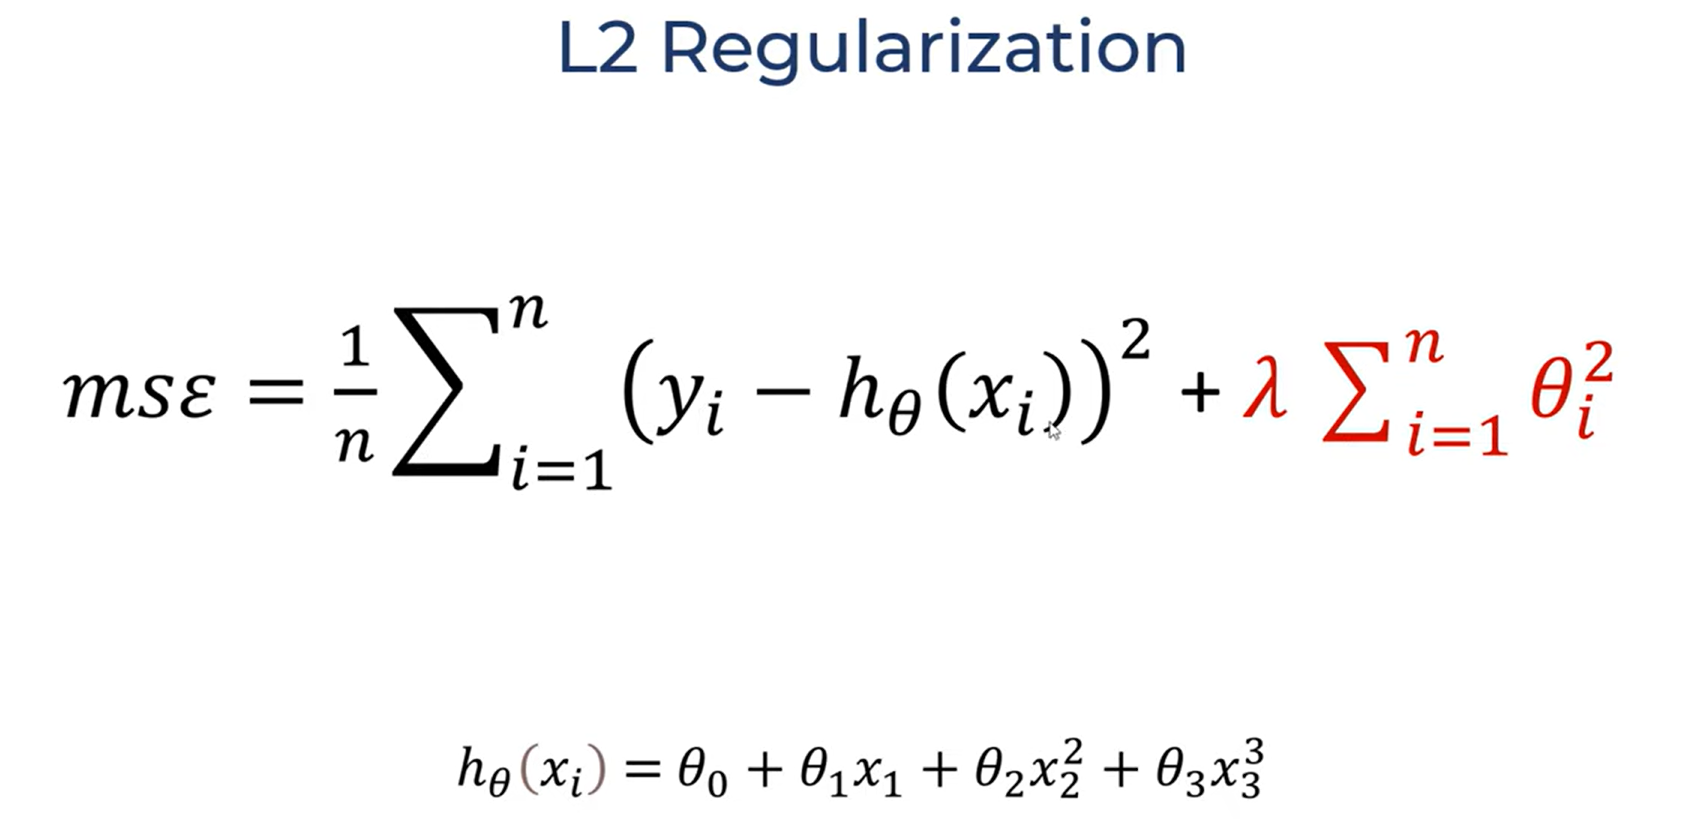

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
df.shape

(34857, 21)

In [ ]:
cols_to_use=['Suburb','Rooms','Type','Price','Method','SellerG','Distance','Bathroom','Bedroom2','Car','Landsize','BuildingArea',	'CouncilArea','Regionname','Propertycount']
df=df[cols_to_use]
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Bedroom2,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,1.0,2.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,2.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,2.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,2.0,3.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,3.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [ ]:
df.shape

(34857, 15)

In [ ]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bathroom          8226
Bedroom2          8217
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
cols_to_fill_zero=['Distance','Bathroom','Bedroom2','Car','Propertycount']
df[cols_to_fill_zero]=df[cols_to_fill_zero].fillna(0)
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             0
Bathroom             0
Bedroom2             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
dtype: int64

In [ ]:
df['Landsize']=df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].mean())
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bathroom            0
Bedroom2            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [ ]:
# it is fine to drop naN columns if the proportion is low 
df.dropna(inplace=True)
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Bedroom2         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
df=pd.get_dummies(df,drop_first=True) # txt are converted into numerics
df.shape

(27244, 745)

In [ ]:
x=df.drop('Price',axis='columns')
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

In [ ]:
reg.score(x_test,y_test)


0.13853683161589614

In [ ]:
reg.score(x_train,y_train)

# the result is overfitting

0.6827792395792723

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(x_test,y_test)

0.6637588958272085

In [ ]:
from sklearn import linear_model
ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(x_test,y_test)

0.6670848945194959